Data Preparation and Cleaning: The data was already pretty clean so I spent a lot of time just trying different ways to see exactly what my data consisted of. There was a Git merge issue that I was able to fix by opening my file on my drive and editing the Excel doc.  

1. Handling Missing Values: Critical missing values were removed to ensure data integrity. I tired giving an overview of missing data, removed rows missing critical identifiers or pollen load, and imputed missing flower species (if there was a small proportion). 

2. Handling Duplicates: Duplicates were identified and removed, ensuring each bee-flower-pollen observation is unique and analysis is not skewed.

3. Data Types: Proper data types facilitate accurate grouping and time-based analysis. I tried to check and correct the data types. 

In [496]:

#imports 
# For data manipulation 
import pandas as pd
import io
# Basic plotting
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
# For more advanced visualizations
import seaborn as sns
import sqlite3



In [497]:
#Read in the Dataset
# If the file is in a 'data' folder
pollen_load_data = pd.read_csv('data/2015_pollen_load_data.csv')

In [498]:
#First look at the dataset
pollen_load_data

,Farm,Type,Round,Date,Species,Load,Netted on,Plant pollen,Status,Proportion,Weight
0,Farm1,ELS,One,24/04/2015,Andrena bicolor,1,Sinapis arvensis,Sinapis arvensis,Wild,100,100
1,Farm1,ELS,One,24/04/2015,Andrena bicolor,0.25,Sinapis arvensis,Sinapis arvensis,Wild,100,25
2,Farm1,ELS,One,24/04/2015,Andrena bicolor,0.75,Sinapis arvensis,Sinapis arvensis,Wild,100,75
3,Farm1,ELS,One,24/04/2015,Andrena carantonica,1,vegetation,Acer campestre,Wild,100,100
4,Farm1,ELS,One,24/04/2015,Andrena carantonica,1,vegetation,Acer campestre,Wild,100,100
...,...,...,...,...,...,...,...,...,...,...,...
3518,Farm9,HLS,Four,30/07/2015,Lasioglossum calceatum,0.5,Senecio jacobea,Senecio jacobea,Wild,95,47.5
3519,Farm9,HLS,Four,30/07/2015,Lasioglossum calceatum,1,Senecio jacobea,Senecio jacobea,Wild,55,55
3520,Farm9,HLS,Four,30/07/2015,Lasioglossum calceatum,0.5,Senecio jacobea,Sonchus arvensis,Wild,5,2.5
3521,Farm9,HLS,Four,30/07/2015,Lasioglossum malachurum,0.25,Tripleurospermum inodorum,Convolvulus arvensis,Wild,100,25


In [499]:
#Drop/rename columns
pollen_load_data.columns

Index(['Farm', 'Type', 'Round', 'Date', 'Species', 'Load', 'Netted on',
       'Plant pollen', 'Status', 'Proportion', 'Weight'],
      dtype='object')

In [500]:
# Data has been cleaned - no need to drop columns
pollen_load_data.head(10)

,Farm,Type,Round,Date,Species,Load,Netted on,Plant pollen,Status,Proportion,Weight
0,Farm1,ELS,One,24/04/2015,Andrena bicolor,1,Sinapis arvensis,Sinapis arvensis,Wild,100,100
1,Farm1,ELS,One,24/04/2015,Andrena bicolor,0.25,Sinapis arvensis,Sinapis arvensis,Wild,100,25
2,Farm1,ELS,One,24/04/2015,Andrena bicolor,0.75,Sinapis arvensis,Sinapis arvensis,Wild,100,75
3,Farm1,ELS,One,24/04/2015,Andrena carantonica,1,vegetation,Acer campestre,Wild,100,100
4,Farm1,ELS,One,24/04/2015,Andrena carantonica,1,vegetation,Acer campestre,Wild,100,100
5,Farm1,ELS,One,24/04/2015,Andrena dorsata,0.5,Sinapis arvensis,Sinapis arvensis,Wild,100,50
6,Farm1,ELS,One,24/04/2015,Andrena flavipes,0.75,Sinapis arvensis,Sinapis arvensis,Wild,100,75
7,Farm1,ELS,One,24/04/2015,Andrena flavipes,0.75,Sinapis arvensis,Sinapis arvensis,Wild,100,75
8,Farm1,ELS,One,24/04/2015,Andrena flavipes,1,Sinapis arvensis,Sinapis arvensis,Wild,100,100
9,Farm1,ELS,One,24/04/2015,Andrena haemorrhoa,1,Sinapis arvensis,Sinapis arvensis,Wild,100,100


In [501]:
# Find all unnamed columns
unnamed_cols = [col for col in pollen_load_data.columns if 'Unnamed' in str(col)]

if unnamed_cols:
    pollen_load_data.drop(columns=unnamed_cols, inplace=True)
    print(f"Dropped columns: {unnamed_cols}")
else:
    print("No unnamed columns found")

No unnamed columns found


In [502]:
#NaNs
pollen_load_data.isnull().sum() * 100 / len(pollen_load_data)

Farm            0.00000
Type            0.05677
Round           0.05677
Date            0.05677
Species         0.05677
Load            0.05677
Netted on       0.05677
Plant pollen    0.05677
Status          0.05677
Proportion      0.05677
Weight          0.05677
dtype: float64

In [503]:
# Reload data to start fresh
pollen_load_data = pd.read_csv('data/2015_pollen_load_data.csv')

# Drop all unnamed columns at once
unnamed_cols = [col for col in pollen_load_data.columns if 'Unnamed' in str(col)]
if unnamed_cols:
    pollen_load_data.drop(columns=unnamed_cols, inplace=True)
    
print("Cleaned columns:")
print(pollen_load_data.columns.tolist())

Cleaned columns:
['Farm', 'Type', 'Round', 'Date', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status', 'Proportion', 'Weight']


In [504]:
# Check what columns exist
print("Available columns:")
print(pollen_load_data.columns.tolist())

Available columns:
['Farm', 'Type', 'Round', 'Date', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status', 'Proportion', 'Weight']


In [505]:
# Find columns that might contain dates
date_columns = [col for col in pollen_load_data.columns if any(word in col.lower() for word in ['date', 'time', 'day', 'month', 'year'])]
print("Potential date columns:", date_columns)

Potential date columns: ['Date']


In [506]:
# Look at the data to identify the date column
print(pollen_load_data.head())
print("\nColumn data types:")
print(pollen_load_data.dtypes)

    Farm Type Round        Date              Species  Load         Netted on  \
0  Farm1  ELS   One  24/04/2015      Andrena bicolor     1  Sinapis arvensis   
1  Farm1  ELS   One  24/04/2015      Andrena bicolor  0.25  Sinapis arvensis   
2  Farm1  ELS   One  24/04/2015      Andrena bicolor  0.75  Sinapis arvensis   
3  Farm1  ELS   One  24/04/2015  Andrena carantonica     1        vegetation   
4  Farm1  ELS   One  24/04/2015  Andrena carantonica     1        vegetation   

       Plant pollen Status Proportion Weight  
0  Sinapis arvensis   Wild        100    100  
1  Sinapis arvensis   Wild        100     25  
2  Sinapis arvensis   Wild        100     75  
3    Acer campestre   Wild        100    100  
4    Acer campestre   Wild        100    100  

Column data types:
Farm            object
Type            object
Round           object
Date            object
Species         object
Load            object
Netted on       object
Plant pollen    object
Status          object
Proportion

In [507]:
#Seperate the data from one column into multiple columns 
pollen_load_data.head()

,Farm,Type,Round,Date,Species,Load,Netted on,Plant pollen,Status,Proportion,Weight
0,Farm1,ELS,One,24/04/2015,Andrena bicolor,1,Sinapis arvensis,Sinapis arvensis,Wild,100,100
1,Farm1,ELS,One,24/04/2015,Andrena bicolor,0.25,Sinapis arvensis,Sinapis arvensis,Wild,100,25
2,Farm1,ELS,One,24/04/2015,Andrena bicolor,0.75,Sinapis arvensis,Sinapis arvensis,Wild,100,75
3,Farm1,ELS,One,24/04/2015,Andrena carantonica,1,vegetation,Acer campestre,Wild,100,100
4,Farm1,ELS,One,24/04/2015,Andrena carantonica,1,vegetation,Acer campestre,Wild,100,100


In [508]:
# Find columns that might contain pollen data
pollen_columns = [col for col in pollen_load_data.columns if 'pollen' in col.lower()]
print("Pollen-related columns:", pollen_columns)

Pollen-related columns: ['Plant pollen']


In [509]:
# Look for columns with similar names
for col in pollen_load_data.columns:
    if any(word in col.lower() for word in ['pollen', 'plant', 'species', 'flower']):
        print(f"Potential column: {col}")

Potential column: Species
Potential column: Plant pollen


In [510]:
# Look at the first few rows to understand the data structure
print("First 5 rows of the dataset:")
print(pollen_load_data.head())
print("\nColumn names and types:")
print(pollen_load_data.dtypes)

First 5 rows of the dataset:
    Farm Type Round        Date              Species  Load         Netted on  \
0  Farm1  ELS   One  24/04/2015      Andrena bicolor     1  Sinapis arvensis   
1  Farm1  ELS   One  24/04/2015      Andrena bicolor  0.25  Sinapis arvensis   
2  Farm1  ELS   One  24/04/2015      Andrena bicolor  0.75  Sinapis arvensis   
3  Farm1  ELS   One  24/04/2015  Andrena carantonica     1        vegetation   
4  Farm1  ELS   One  24/04/2015  Andrena carantonica     1        vegetation   

       Plant pollen Status Proportion Weight  
0  Sinapis arvensis   Wild        100    100  
1  Sinapis arvensis   Wild        100     25  
2  Sinapis arvensis   Wild        100     75  
3    Acer campestre   Wild        100    100  
4    Acer campestre   Wild        100    100  

Column names and types:
Farm            object
Type            object
Round           object
Date            object
Species         object
Load            object
Netted on       object
Plant pollen    object

In [511]:
# Get info about all columns
print("Dataset Info:")
print(pollen_load_data.info())
print("\nFirst 5 rows:")
print(pollen_load_data.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3523 entries, 0 to 3522
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Farm          3523 non-null   object
 1   Type          3521 non-null   object
 2   Round         3521 non-null   object
 3   Date          3521 non-null   object
 4   Species       3521 non-null   object
 5   Load          3521 non-null   object
 6   Netted on     3521 non-null   object
 7   Plant pollen  3521 non-null   object
 8   Status        3521 non-null   object
 9   Proportion    3521 non-null   object
 10  Weight        3521 non-null   object
dtypes: object(11)
memory usage: 302.9+ KB
None

First 5 rows:
    Farm Type Round        Date              Species  Load         Netted on  \
0  Farm1  ELS   One  24/04/2015      Andrena bicolor     1  Sinapis arvensis   
1  Farm1  ELS   One  24/04/2015      Andrena bicolor  0.25  Sinapis arvensis   
2  Farm1  ELS   One  24/04/201

In [512]:
#Remove duplicates
pollen_load_data.loc[pollen_load_data.duplicated(keep=False)]

pollen_load_data.drop_duplicates(keep="first", inplace=True)

In [513]:
pollen_load_data.loc[pollen_load_data.duplicated(keep=False)]


,Farm,Type,Round,Date,Species,Load,Netted on,Plant pollen,Status,Proportion,Weight


In [514]:
#Save as a variable
pollen_df = pd.read_csv("data/2015_pollen_load_data.csv")
pollen_df.head()

,Farm,Type,Round,Date,Species,Load,Netted on,Plant pollen,Status,Proportion,Weight
0,Farm1,ELS,One,24/04/2015,Andrena bicolor,1,Sinapis arvensis,Sinapis arvensis,Wild,100,100
1,Farm1,ELS,One,24/04/2015,Andrena bicolor,0.25,Sinapis arvensis,Sinapis arvensis,Wild,100,25
2,Farm1,ELS,One,24/04/2015,Andrena bicolor,0.75,Sinapis arvensis,Sinapis arvensis,Wild,100,75
3,Farm1,ELS,One,24/04/2015,Andrena carantonica,1,vegetation,Acer campestre,Wild,100,100
4,Farm1,ELS,One,24/04/2015,Andrena carantonica,1,vegetation,Acer campestre,Wild,100,100


In [515]:
# Look for categorical columns that might represent status
for col in pollen_df.columns:
    print(f"Column: {col}")
    print(f"Data type: {pollen_df[col].dtype}")
    print(f"Unique values: {pollen_df[col].nunique()}")
    print(f"Sample values: {pollen_df[col].unique()[:5]}")
    print("-" * 40)

Column: Farm
Data type: object
Unique values: 17
Sample values: ['Farm1' 'Farm10' 'Farm11' 'Farm12' 'Farm13']
----------------------------------------
Column: Type
Data type: object
Unique values: 3
Sample values: ['ELS' 'HLS' nan 'Type']
----------------------------------------
Column: Round
Data type: object
Unique values: 5
Sample values: ['One' 'Two' 'Three' 'Four' nan]
----------------------------------------
Column: Date
Data type: object
Unique values: 31
Sample values: ['24/04/2015' '16/06/2015' '29/06/2015' '30/04/2015' '8/6/2015']
----------------------------------------
Column: Species
Data type: object
Unique values: 48
Sample values: ['Andrena bicolor' 'Andrena carantonica' 'Andrena dorsata'
 'Andrena flavipes' 'Andrena haemorrhoa']
----------------------------------------
Column: Load
Data type: object
Unique values: 8
Sample values: ['1' '0.25' '0.75' '0.5' '0.125']
----------------------------------------
Column: Netted on
Data type: object
Unique values: 62
Sample valu

In [516]:
# Try these common variations:
possible_names = ['Plant pollen', 'Plant_pollen', 'plant pollen', 'Pollen', 'pollen', 'PlantPollen']

for name in possible_names:
    if name in pollen_df.columns:
        print(f"Found column: '{name}'")
        avg_plant_pollen = pollen_df[name].value_counts().sort_values(ascending=False)
        print(avg_plant_pollen)
        break
else:
    print("Column not found. Available columns:")
    print(pollen_df.columns.tolist())

Found column: 'Plant pollen'
Plant pollen
Tripleurospermum inodorum    414
Leucanthemum vulgare         304
Heracleum sphondylium        264
Centaurea nigra              224
Rubus fruticosus agg.        180
                            ... 
Euphorbia amygdaloides         2
Castanea sativa                2
Prunella vulgaris              2
Origanum vulgare               2
Plant pollen                   1
Name: count, Length: 94, dtype: int64


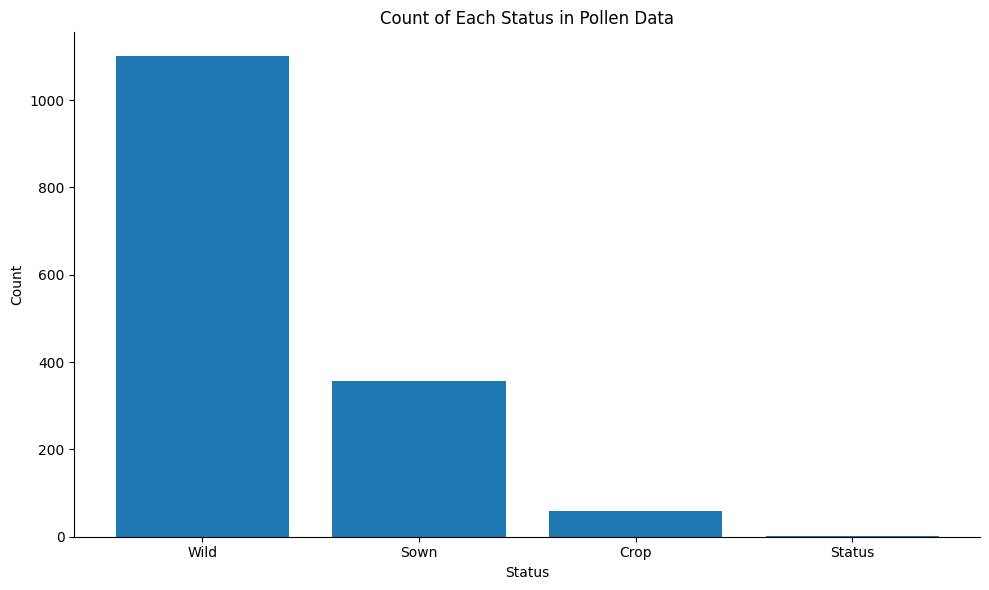

In [517]:
# Get value counts for Status column
value_counts = pollen_load_data['Status'].value_counts()

# Select top 5 statuses
value_counts = value_counts.head(5)

plt.figure(figsize=(10, 6))
plt.bar(value_counts.index, value_counts.values)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Count of Each Status in Pollen Data')
plt.tight_layout()
plt.show()

The work completed in this notebook helped me to figure out what exactly my data is, what it can do, and what it can show.

The above graph shows that bees are gathering plant pollen from the Wild flowers the most. 

Top 5 Bee Species:
Species
Lasioglossum malachurum    1448
Andrena semilaevis          298
Andrena flavipes            222
Lasioglossum pauxillum      204
Lasioglossum calceatum      142
Name: count, dtype: int64


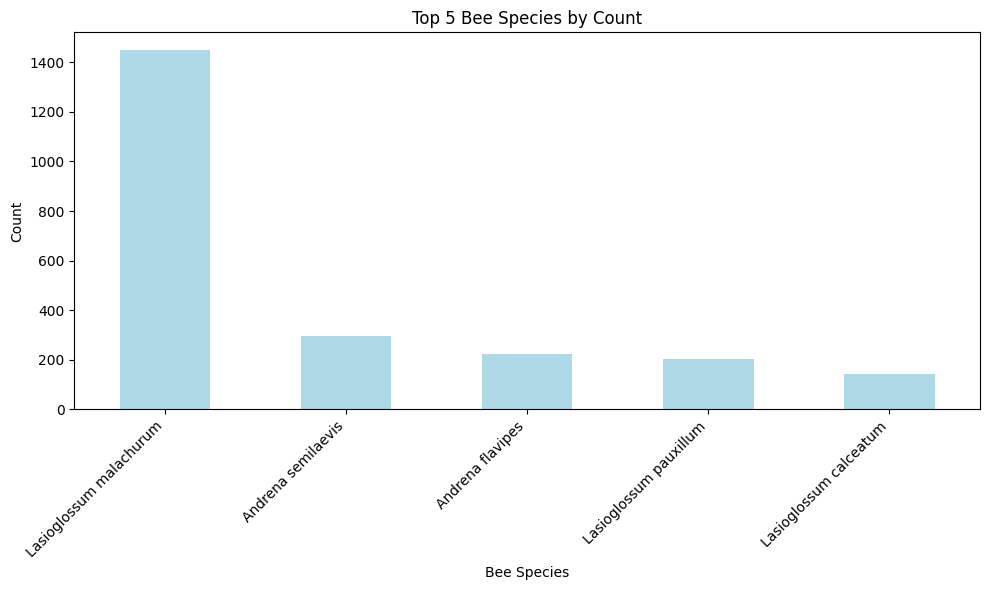

Column data types:
Farm            object
Type            object
Round           object
Date            object
Species         object
Load            object
Netted on       object
Plant pollen    object
Status          object
Proportion      object
Weight          object
dtype: object

Categorical columns: ['Farm', 'Type', 'Round', 'Date', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status', 'Proportion', 'Weight']

Farm unique values: 17
Sample values: ['Farm1' 'Farm10' 'Farm11' 'Farm12' 'Farm13']

Type unique values: 3
Sample values: ['ELS' 'HLS' nan 'Type']

Round unique values: 5
Sample values: ['One' 'Two' 'Three' 'Four' nan]

Date unique values: 31
Sample values: ['24/04/2015' '16/06/2015' '29/06/2015' '30/04/2015' '8/6/2015']

Species unique values: 48
Sample values: ['Andrena bicolor' 'Andrena carantonica' 'Andrena dorsata'
 'Andrena flavipes' 'Andrena haemorrhoa']

Load unique values: 8
Sample values: ['1' '0.25' '0.75' '0.5' '0.125']

Netted on unique values: 62
Sample v

In [518]:
# Show the top 5 bee species with counts
print("Top 5 Bee Species:")
top_5_species = pollen_df['Species'].value_counts().head(5)
print(top_5_species)

# Create a simple bar plot
plt.figure(figsize=(10, 6))
top_5_species.plot(kind='bar', color='lightblue')
plt.title('Top 5 Bee Species by Count')
plt.xlabel('Bee Species')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()# Check data types to find categorical columns
print("Column data types:")
print(pollen_df.dtypes)

# Look for text/object columns that might represent species
categorical_cols = pollen_df.select_dtypes(include=['object', 'category']).columns
print(f"\nCategorical columns: {categorical_cols.tolist()}")

# Show unique values for each categorical column
for col in categorical_cols:
    print(f"\n{col} unique values: {pollen_df[col].nunique()}")
    print(f"Sample values: {pollen_df[col].unique()[:5]}")

The above graph is showing the different bee species, and how many of each species were studied for this particular data research. 

In [519]:
# Load both datasets
pollen_df = pd.read_csv('data/2015_pollen_load_data.csv')
visit_df = pd.read_csv('data/2013_2015_flower_visitation_data.csv')

# Check the structure of both DataFrames
print("=== Pollen DataFrame Info ===")
print(pollen_df.info())
print("\n=== Visit DataFrame Info ===")
print(visit_df.info())

# Preview the data
print("\n=== Pollen DataFrame Sample ===")
print(pollen_df.head())
print("\n=== Visit DataFrame Sample ===")
print(visit_df.head())

=== Pollen DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3523 entries, 0 to 3522
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Farm          3523 non-null   object
 1   Type          3521 non-null   object
 2   Round         3521 non-null   object
 3   Date          3521 non-null   object
 4   Species       3521 non-null   object
 5   Load          3521 non-null   object
 6   Netted on     3521 non-null   object
 7   Plant pollen  3521 non-null   object
 8   Status        3521 non-null   object
 9   Proportion    3521 non-null   object
 10  Weight        3521 non-null   object
dtypes: object(11)
memory usage: 302.9+ KB
None

=== Visit DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Farm      2467 non-null   object
 1   Type      246

In [520]:
# Check what columns exist and their data types
print("All columns and their types:")
for col in pollen_df.columns:
    dtype = pollen_df[col].dtype
    sample_val = str(pollen_df[col].iloc[0]) if len(pollen_df) > 0 else 'N/A'
    print(f"{col}: {dtype} | Sample: {sample_val}")

# Look for potential load columns
print("\nPotential load columns:")
load_candidates = [col for col in pollen_df.columns if any(word in col.lower() for word in ['load', 'weight', 'mass', 'size', 'amount'])]
for col in load_candidates:
    print(f"- {col}: {pollen_df[col].dtype}")
    print(f"  Unique values: {pollen_df[col].unique()[:5]}")

# Look for species columns  
print("\nPotential species columns:")
species_candidates = [col for col in pollen_df.columns if any(word in col.lower() for word in ['species', 'bee', 'type', 'genus', 'name'])]
for col in species_candidates:
    print(f"- {col}: {pollen_df[col].dtype}")
    print(f"  Unique values: {pollen_df[col].unique()[:5]}")

All columns and their types:
Farm: object | Sample: Farm1
Type: object | Sample: ELS
Round: object | Sample: One
Date: object | Sample: 24/04/2015
Species: object | Sample: Andrena bicolor
Load: object | Sample: 1
Netted on: object | Sample: Sinapis arvensis
Plant pollen: object | Sample: Sinapis arvensis
Status: object | Sample: Wild
Proportion: object | Sample: 100
Weight: object | Sample: 100

Potential load columns:
- Load: object
  Unique values: ['1' '0.25' '0.75' '0.5' '0.125']
- Weight: object
  Unique values: ['100' '25' '75' '50' '12.5']

Potential species columns:
- Type: object
  Unique values: ['ELS' 'HLS' nan 'Type']
- Species: object
  Unique values: ['Andrena bicolor' 'Andrena carantonica' 'Andrena dorsata'
 'Andrena flavipes' 'Andrena haemorrhoa']


In [521]:
# Clean the Date column before conversion
if 'Date' in pollen_load_data.columns:
    print("Original Date column sample:")
    print(pollen_load_data['Date'].head(10))
    
    # Remove rows where Date column contains non-date strings
    mask = ~pollen_load_data['Date'].astype(str).str.lower().isin(['date', 'nan', 'null', ''])
    clean_data = pollen_load_data[mask].copy()
    
    print(f"\nData cleaning results:")
    print(f"Original rows: {len(pollen_load_data)}")
    print(f"Clean rows: {len(clean_data)}")
    print(f"Removed rows: {len(pollen_load_data) - len(clean_data)}")
    
    #  Convert the cleaned data
    try:
        clean_data['Date'] = pd.to_datetime(clean_data['Date'], dayfirst=True)
        print("Date conversion successful!")
        print(f"Date range: {clean_data['Date'].min()} to {clean_data['Date'].max()}")
        
        # Replace the original dataframe with cleaned version
        pollen_load_data = clean_data
        
    except Exception as e:
        print(f"Error even after cleaning: {e}")
        print("Sample of remaining Date values:")
        print(clean_data['Date'].unique()[:10])
else:
    print("'Date' column not found in data")

Original Date column sample:
0     24/04/2015
1     24/04/2015
2     24/04/2015
3     24/04/2015
5     24/04/2015
6     24/04/2015
8     24/04/2015
9     24/04/2015
10    24/04/2015
11    24/04/2015
Name: Date, dtype: object

Data cleaning results:
Original rows: 1519
Clean rows: 1516
Removed rows: 3
Date conversion successful!
Date range: 2015-04-22 00:00:00 to 2015-08-10 00:00:00


In [522]:
# Inspect the Date column thoroughly
if 'Date' in pollen_load_data.columns:
    print("Date column inspection:")
    print(f"Data type: {pollen_load_data['Date'].dtype}")
    print(f"Total values: {len(pollen_load_data['Date'])}")
    print(f"Unique values: {pollen_load_data['Date'].nunique()}")
    
    print(f"\nFirst 15 values:")
    print(pollen_load_data['Date'].head(15).tolist())
    
    print(f"\nValue around position 31:")
    if len(pollen_load_data) > 35:
        print(pollen_load_data['Date'].iloc[28:35].tolist())
    
    print(f"\nUnique values (first 20):")
    print(pollen_load_data['Date'].unique()[:20])
    
    # Check for the specific problematic value
    problem_rows = pollen_load_data[pollen_load_data['Date'].astype(str) == 'Date']
    if len(problem_rows) > 0:
        print(f"\nFound {len(problem_rows)} rows with 'Date' as value:")
        print(problem_rows.head())

Date column inspection:
Data type: datetime64[ns]
Total values: 1516
Unique values: 30

First 15 values:
[Timestamp('2015-04-24 00:00:00'), Timestamp('2015-04-24 00:00:00'), Timestamp('2015-04-24 00:00:00'), Timestamp('2015-04-24 00:00:00'), Timestamp('2015-04-24 00:00:00'), Timestamp('2015-04-24 00:00:00'), Timestamp('2015-04-24 00:00:00'), Timestamp('2015-04-24 00:00:00'), Timestamp('2015-04-24 00:00:00'), Timestamp('2015-04-24 00:00:00'), Timestamp('2015-04-24 00:00:00'), Timestamp('2015-04-24 00:00:00'), Timestamp('2015-04-24 00:00:00'), Timestamp('2015-04-24 00:00:00'), Timestamp('2015-04-24 00:00:00')]

Value around position 31:
[Timestamp('2015-06-16 00:00:00'), Timestamp('2015-06-16 00:00:00'), Timestamp('2015-06-16 00:00:00'), Timestamp('2015-06-16 00:00:00'), Timestamp('2015-06-29 00:00:00'), Timestamp('2015-06-29 00:00:00'), Timestamp('2015-06-29 00:00:00')]

Unique values (first 20):
<DatetimeArray>
['2015-04-24 00:00:00', '2015-06-16 00:00:00', '2015-06-29 00:00:00',
 '201

In [523]:
# Summary statistics
print(pollen_load_data.describe())

                                Date
count                           1516
mean   2015-06-20 23:30:33.245382400
min              2015-04-22 00:00:00
25%              2015-06-10 00:00:00
50%              2015-06-27 00:00:00
75%              2015-07-03 00:00:00
max              2015-08-10 00:00:00


In [524]:
# Use cleaned data for all analysis
print("My actual bee pollen data:")
print(pollen_load_data.head())
print(f"Shape: {pollen_load_data.shape}")
print(f"Columns: {pollen_load_data.columns.tolist()}")

My actual bee pollen data:
    Farm Type Round       Date              Species  Load         Netted on  \
0  Farm1  ELS   One 2015-04-24      Andrena bicolor     1  Sinapis arvensis   
1  Farm1  ELS   One 2015-04-24      Andrena bicolor  0.25  Sinapis arvensis   
2  Farm1  ELS   One 2015-04-24      Andrena bicolor  0.75  Sinapis arvensis   
3  Farm1  ELS   One 2015-04-24  Andrena carantonica     1        vegetation   
5  Farm1  ELS   One 2015-04-24      Andrena dorsata   0.5  Sinapis arvensis   

       Plant pollen Status Proportion Weight  
0  Sinapis arvensis   Wild        100    100  
1  Sinapis arvensis   Wild        100     25  
2  Sinapis arvensis   Wild        100     75  
3    Acer campestre   Wild        100    100  
5  Sinapis arvensis   Wild        100     50  
Shape: (1516, 11)
Columns: ['Farm', 'Type', 'Round', 'Date', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status', 'Proportion', 'Weight']


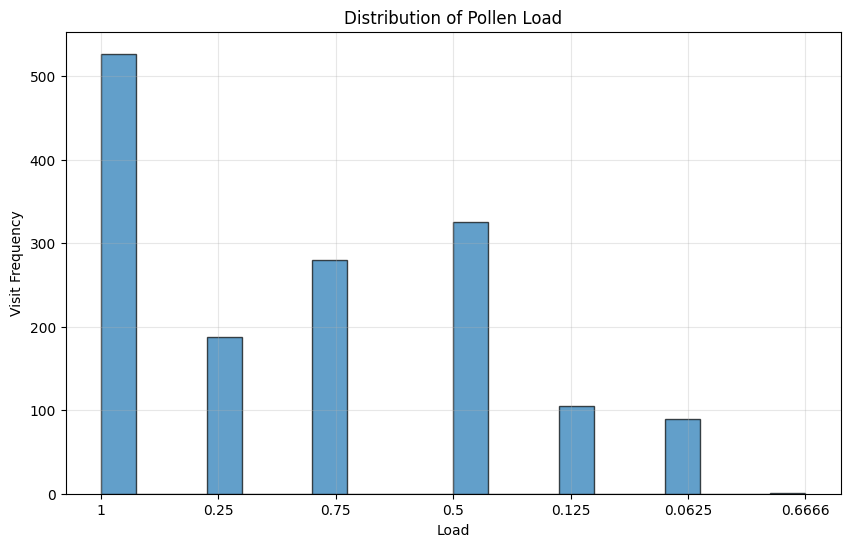

Plotted 1516 valid values


In [525]:
def safe_histogram(data, column_name, title="Distribution"):
    if column_name not in data.columns:
        print(f"Column '{column_name}' not found. Available columns:")
        print(data.columns.tolist())
        return
    
    clean_data = data[column_name].dropna()
    
    if len(clean_data) == 0:
        print(f"No valid data found in column '{column_name}'")
        return
    
    plt.figure(figsize=(10, 6))
    plt.hist(clean_data, bins=20, alpha=0.7, edgecolor='black')
    plt.title(title)
    plt.xlabel(column_name)
    plt.ylabel('Visit Frequency')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    print(f"Plotted {len(clean_data)} valid values")

# Usage 
safe_histogram(pollen_load_data, 'Load', 'Distribution of Pollen Load')

Visit Frequency vs. Pollen Load 

Purpose: This chart explains the relationship between how often a bee visits flowers and the amount of pollen it collects. It can indicate whether more frequent visits correlate with greater pollen collection. 

Interpretation: If the chart shows a positive correlaton, it suggests that bees who visit flowers more often are also collecting more pollen, highlighting the link between activity level and foraging success. 

In [526]:
# Find common columns between both DataFrames
common_cols = set(pollen_df.columns).intersection(set(visit_df.columns))
print("Common columns between datasets:")
print(list(common_cols))

# Check the structure of both DataFrames
print("\nPollen DataFrame columns:")
print(pollen_df.columns.tolist())

print("\nVisit DataFrame columns:")
print(visit_df.columns.tolist())

Common columns between datasets:
['Species', 'Status', 'Farm', 'Date', 'Round', 'Type']

Pollen DataFrame columns:
['Farm', 'Type', 'Round', 'Date', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status', 'Proportion', 'Weight']

Visit DataFrame columns:
['Farm', 'Type', 'Round', 'Date', 'Species', 'Number', 'Caste', 'Visiting', 'Status', 'Purpose', 'Family']


In [527]:
# Look for potential merge keys
for col in common_cols:
    print(f"\nColumn: {col}")
    print(f"Pollen DF - Type: {pollen_df[col].dtype}, Unique values: {pollen_df[col].nunique()}")
    print(f"Visit DF - Type: {visit_df[col].dtype}, Unique values: {visit_df[col].nunique()}")
    print(f"Sample values: {pollen_df[col].unique()[:3]}")


Column: Species
Pollen DF - Type: object, Unique values: 48
Visit DF - Type: object, Unique values: 87
Sample values: ['Andrena bicolor' 'Andrena carantonica' 'Andrena dorsata']

Column: Status
Pollen DF - Type: object, Unique values: 4
Visit DF - Type: object, Unique values: 4
Sample values: ['Wild' 'Sown' 'Crop']

Column: Farm
Pollen DF - Type: object, Unique values: 17
Visit DF - Type: object, Unique values: 22
Sample values: ['Farm1' 'Farm10' 'Farm11']

Column: Date
Pollen DF - Type: object, Unique values: 31
Visit DF - Type: object, Unique values: 84
Sample values: ['24/04/2015' '16/06/2015' '29/06/2015']

Column: Round
Pollen DF - Type: object, Unique values: 5
Visit DF - Type: object, Unique values: 5
Sample values: ['One' 'Two' 'Three']

Column: Type
Pollen DF - Type: object, Unique values: 3
Visit DF - Type: object, Unique values: 3
Sample values: ['ELS' 'HLS' nan]


In [528]:
# Step 1: Check if DataFrames exist
print("Checking DataFrames...")
print(f"pollen_df type: {type(pollen_df)}")
print(f"visit_df type: {type(visit_df)}")

if pollen_df is not None and visit_df is not None:
    # Step 2: Find merge columns
    common_cols = set(pollen_df.columns).intersection(set(visit_df.columns))
    print(f"Common columns: {list(common_cols)}")
    
    if common_cols:
        # Step 3: Attempt merge
        merge_col = list(common_cols)[0]
        print(f"Attempting to merge on: '{merge_col}'")
        
        try:
            merged_df = pd.merge(pollen_df, visit_df, on=merge_col, how='inner')
            print(f"Merge successful! Shape: {merged_df.shape}")
            
            # Step 4: Check for required columns before cleaning
            required_cols = ['Species', 'Load']
            available_cols = merged_df.columns.tolist()
            
            print(f"Required columns: {required_cols}")
            print(f"Available columns: {available_cols}")
            
            missing_required = [col for col in required_cols if col not in available_cols]
            
            if not missing_required:
                # Step 5: Safe dropna
                initial_shape = merged_df.shape
                merged_df = merged_df.dropna(subset=required_cols)
                final_shape = merged_df.shape
                
                print(f"Cleaned data: {initial_shape} -> {final_shape}")
            else:
                print(f"Cannot clean data - missing columns: {missing_required}")
                
        except Exception as e:
            print(f"Merge failed: {e}")
            merged_df = None
    else:
        print("No common columns for merging")
        merged_df = None
else:
    print("One or both DataFrames are None")
    merged_df = None

# Step 6: Final check
if merged_df is not None:
    print(f"Final merged_df shape: {merged_df.shape}")
    print("Success!")
else:
    print("merged_df is still None - check the steps above")

Checking DataFrames...
pollen_df type: <class 'pandas.core.frame.DataFrame'>
visit_df type: <class 'pandas.core.frame.DataFrame'>
Common columns: ['Species', 'Status', 'Farm', 'Date', 'Round', 'Type']
Attempting to merge on: 'Species'
Merge successful! Shape: (647301, 21)
Required columns: ['Species', 'Load']
Available columns: ['Farm_x', 'Type_x', 'Round_x', 'Date_x', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status_x', 'Proportion', 'Weight', 'Farm_y', 'Type_y', 'Round_y', 'Date_y', 'Number', 'Caste', 'Visiting', 'Status_y', 'Purpose', 'Family']
Cleaned data: (647301, 21) -> (647297, 21)
Final merged_df shape: (647297, 21)
Success!


In [529]:
actual_load_column = 'Load'  

if actual_load_column in pollen_load_data.columns:
    print("Unique values:")
    print(pollen_load_data[actual_load_column].unique())
    
    print("\nDescriptive statistics:")
    print(pollen_load_data[actual_load_column].describe())
else:
    print(f"Column '{actual_load_column}' not found")

Unique values:
['1' '0.25' '0.75' '0.5' '0.125' '0.0625' '0.6666']

Descriptive statistics:
count     1516
unique       7
top          1
freq       527
Name: Load, dtype: object


In [530]:
# First, load the data and see what I'm working with
print("Dataset shape:", pollen_load_data.shape)
print("\nAll columns:")
for i, col in enumerate(pollen_load_data.columns):
    print(f"{i}: {col}")

# Show first few rows to understand the data structure
print("\nFirst 5 rows:")
print(pollen_load_data.head())

Dataset shape: (1516, 11)

All columns:
0: Farm
1: Type
2: Round
3: Date
4: Species
5: Load
6: Netted on
7: Plant pollen
8: Status
9: Proportion
10: Weight

First 5 rows:
    Farm Type Round       Date              Species  Load         Netted on  \
0  Farm1  ELS   One 2015-04-24      Andrena bicolor     1  Sinapis arvensis   
1  Farm1  ELS   One 2015-04-24      Andrena bicolor  0.25  Sinapis arvensis   
2  Farm1  ELS   One 2015-04-24      Andrena bicolor  0.75  Sinapis arvensis   
3  Farm1  ELS   One 2015-04-24  Andrena carantonica     1        vegetation   
5  Farm1  ELS   One 2015-04-24      Andrena dorsata   0.5  Sinapis arvensis   

       Plant pollen Status Proportion Weight  
0  Sinapis arvensis   Wild        100    100  
1  Sinapis arvensis   Wild        100     25  
2  Sinapis arvensis   Wild        100     75  
3    Acer campestre   Wild        100    100  
5  Sinapis arvensis   Wild        100     50  


In [531]:
pollen_load_data.head()

,Farm,Type,Round,Date,Species,Load,Netted on,Plant pollen,Status,Proportion,Weight
0,Farm1,ELS,One,2015-04-24,Andrena bicolor,1,Sinapis arvensis,Sinapis arvensis,Wild,100,100
1,Farm1,ELS,One,2015-04-24,Andrena bicolor,0.25,Sinapis arvensis,Sinapis arvensis,Wild,100,25
2,Farm1,ELS,One,2015-04-24,Andrena bicolor,0.75,Sinapis arvensis,Sinapis arvensis,Wild,100,75
3,Farm1,ELS,One,2015-04-24,Andrena carantonica,1,vegetation,Acer campestre,Wild,100,100
5,Farm1,ELS,One,2015-04-24,Andrena dorsata,0.5,Sinapis arvensis,Sinapis arvensis,Wild,100,50


In [532]:
#Read in the dataset
flower_visitation_data = pd.read_csv('data/2013_2015_flower_visitation_data.csv')

In [533]:
#First look at the dataset
flower_visitation_data

,Farm,Type,Round,Date,Species,Number,Caste,Visiting,Status,Purpose,Family
0,Farm1,ELS,Four,11/8/2013,Andrena minutula,1,Female,Heracleum sphondylium,Wild,Pollen,Apiaceae
1,Farm1,ELS,Four,11/8/2013,Andrena minutula,3,Female,Heracleum sphondylium,Wild,Pollen,Apiaceae
2,Farm1,ELS,Four,5/8/2014,Andrena minutula,1,Female,Heracleum sphondylium,Wild,Pollen,Apiaceae
3,Farm1,ELS,Four,5/8/2014,Halictus tumulorum,1,Male,Helminthotheca echioides,Wild,Nectar,Asteraceae
4,Farm1,ELS,Four,5/8/2014,Halictus tumulorum,3,Male,Pulicaria dysenterica,Wild,Nectar,Asteraceae
...,...,...,...,...,...,...,...,...,...,...,...
2462,Farm9,HLS,Two,9/6/2015,Andrena semilaevis,5,Female,Heracleum sphondylium,Wild,Pollen,Apiaceae
2463,Farm9,HLS,Two,9/6/2015,Andrena semilaevis,1,Male,Taraxacum agg.,Wild,Nectar,Asteraceae
2464,Farm9,HLS,Two,9/6/2015,Lasioglossum villosulum,1,Female,Crepis vesicaria,Wild,Pollen,Asteraceae
2465,Farm9,HLS,Two,9/6/2015,Sphecodes spinulosus,1,Male,Taraxacum agg.,Wild,Nectar,Asteraceae


In [534]:
#Drop/rename columns
flower_visitation_data.columns

Index(['Farm', 'Type', 'Round', 'Date', 'Species', 'Number', 'Caste',
       'Visiting', 'Status', 'Purpose', 'Family'],
      dtype='object')

In [535]:
# Data has been cleaned - no need to drop columns
flower_visitation_data.head(10)

,Farm,Type,Round,Date,Species,Number,Caste,Visiting,Status,Purpose,Family
0,Farm1,ELS,Four,11/8/2013,Andrena minutula,1,Female,Heracleum sphondylium,Wild,Pollen,Apiaceae
1,Farm1,ELS,Four,11/8/2013,Andrena minutula,3,Female,Heracleum sphondylium,Wild,Pollen,Apiaceae
2,Farm1,ELS,Four,5/8/2014,Andrena minutula,1,Female,Heracleum sphondylium,Wild,Pollen,Apiaceae
3,Farm1,ELS,Four,5/8/2014,Halictus tumulorum,1,Male,Helminthotheca echioides,Wild,Nectar,Asteraceae
4,Farm1,ELS,Four,5/8/2014,Halictus tumulorum,3,Male,Pulicaria dysenterica,Wild,Nectar,Asteraceae
5,Farm1,ELS,Four,5/8/2014,Lasioglossum leucozonium,1,Male,Pulicaria dysenterica,Wild,Nectar,Asteraceae
6,Farm1,ELS,Four,5/8/2014,Lasioglossum malachurum,2,Male,Heracleum sphondylium,Wild,Nectar,Apiaceae
7,Farm1,ELS,Four,5/8/2014,Lasioglossum morio,1,Female,Heracleum sphondylium,Wild,Pollen,Apiaceae
8,Farm1,ELS,Four,5/8/2014,Lasioglossum pauxillum,1,Male,Tripleurospermum inodorum,Wild,Nectar,Asteraceae
9,Farm1,ELS,Four,5/8/2014,Lasioglossum villosulum,1,Male,Pulicaria dysenterica,Wild,Nectar,Asteraceae


In [536]:
#NaNs
flower_visitation_data.isna().sum() * 100 / len(flower_visitation_data)

Farm        0.00000
Type        0.08107
Round       0.08107
Date        0.08107
Species     0.08107
Number      0.08107
Caste       0.08107
Visiting    0.08107
Status      0.08107
Purpose     0.08107
Family      0.08107
dtype: float64

In [537]:
#Check column data types
flower_visitation_data.dtypes

Farm        object
Type        object
Round       object
Date        object
Species     object
Number      object
Caste       object
Visiting    object
Status      object
Purpose     object
Family      object
dtype: object

In [538]:
# Explore my flower visitation data
print("Dataset Info:")
print(flower_visitation_data.info())

print("\nNumeric columns that can be binned:")
numeric_cols = flower_visitation_data.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    print(f"- {col}: range {flower_visitation_data[col].min()} to {flower_visitation_data[col].max()}")

print("\nFirst few rows:")
print(flower_visitation_data.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Farm      2467 non-null   object
 1   Type      2465 non-null   object
 2   Round     2465 non-null   object
 3   Date      2465 non-null   object
 4   Species   2465 non-null   object
 5   Number    2465 non-null   object
 6   Caste     2465 non-null   object
 7   Visiting  2465 non-null   object
 8   Status    2465 non-null   object
 9   Purpose   2465 non-null   object
 10  Family    2465 non-null   object
dtypes: object(11)
memory usage: 212.1+ KB
None

Numeric columns that can be binned:

First few rows:
    Farm Type Round       Date             Species Number   Caste  \
0  Farm1  ELS  Four  11/8/2013    Andrena minutula      1  Female   
1  Farm1  ELS  Four  11/8/2013    Andrena minutula      3  Female   
2  Farm1  ELS  Four   5/8/2014    Andrena minutula      1  Female   
3  Farm

In [539]:
flower_visitation_data.head()

,Farm,Type,Round,Date,Species,Number,Caste,Visiting,Status,Purpose,Family
0,Farm1,ELS,Four,11/8/2013,Andrena minutula,1,Female,Heracleum sphondylium,Wild,Pollen,Apiaceae
1,Farm1,ELS,Four,11/8/2013,Andrena minutula,3,Female,Heracleum sphondylium,Wild,Pollen,Apiaceae
2,Farm1,ELS,Four,5/8/2014,Andrena minutula,1,Female,Heracleum sphondylium,Wild,Pollen,Apiaceae
3,Farm1,ELS,Four,5/8/2014,Halictus tumulorum,1,Male,Helminthotheca echioides,Wild,Nectar,Asteraceae
4,Farm1,ELS,Four,5/8/2014,Halictus tumulorum,3,Male,Pulicaria dysenterica,Wild,Nectar,Asteraceae


In [540]:
# Check available columns
print(flower_visitation_data.columns.tolist())
# or
print(flower_visitation_data.info())

['Farm', 'Type', 'Round', 'Date', 'Species', 'Number', 'Caste', 'Visiting', 'Status', 'Purpose', 'Family']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Farm      2467 non-null   object
 1   Type      2465 non-null   object
 2   Round     2465 non-null   object
 3   Date      2465 non-null   object
 4   Species   2465 non-null   object
 5   Number    2465 non-null   object
 6   Caste     2465 non-null   object
 7   Visiting  2465 non-null   object
 8   Status    2465 non-null   object
 9   Purpose   2465 non-null   object
 10  Family    2465 non-null   object
dtypes: object(11)
memory usage: 212.1+ KB
None


In [541]:
# Find columns that might contain dates
for col in flower_visitation_data.columns:
    sample_value = flower_visitation_data[col].dropna().iloc[0] if not flower_visitation_data[col].dropna().empty else None
    if sample_value and isinstance(sample_value, str) and '-' in str(sample_value):
        print(f"Potential date column: '{col}' - Sample: {sample_value}")

Exploratory Data Analysis (EDA)

A. Descriptive Statistics 

In [542]:
#Summary of pollen load and visit frequency
print(pollen_df['Load'].describe())

count     3521
unique       8
top          1
freq      1318
Name: Load, dtype: object


In [543]:
print(visit_df['Visiting'].describe() )

count               2465
unique               105
top       Taraxacum agg.
freq                 304
Name: Visiting, dtype: object


Insight: The mean and standard deviation of pollen load and visit frequency reveal the typical range of foraging success and activity amoung bees. 

B. Pollen Load by Flower Species 

In [544]:
# Average pollen load per flower species
# Check what's actually in the 'Load' column
print("Load column data type:")
print(pollen_df['Load'].dtype)

print("\nUnique values in 'Load' column:")
print(pollen_df['Load'].unique())

print("\nFirst 10 values:")
print(pollen_df['Load'].head(10))

print("\nValue counts:")
print(pollen_df['Load'].value_counts())

Load column data type:
object

Unique values in 'Load' column:
['1' '0.25' '0.75' '0.5' '0.125' '0.0625' '0.6666' nan 'Load']

First 10 values:
0       1
1    0.25
2    0.75
3       1
4       1
5     0.5
6    0.75
7    0.75
8       1
9       1
Name: Load, dtype: object

Value counts:
Load
1         1318
0.5        730
0.75       624
0.25       406
0.125      236
0.0625     204
0.6666       2
Load         1
Name: count, dtype: int64


Insight: Certain flower species are associated with higher pollen loads, indicating their importance for bee nutrition. 

In [545]:
# If 'Load' contains numeric values stored as strings
pollen_df['Load'] = pd.to_numeric(pollen_df['Load'], errors='coerce')

# Then calculate the mean
avg_pollen_load = pollen_df.groupby('Species')['Load'].mean().sort_values(ascending=False)
print(avg_pollen_load)

Species
Andrena angustior              1.000000
Megachile centuncularis        1.000000
Osmia leaiana                  1.000000
Melitta tricincta              1.000000
Melitta leporina               1.000000
Andrena trimmerana             1.000000
Anthophora plumipes            1.000000
Lasioglossum puncticolle       1.000000
Osmia caerulescens             1.000000
Andrena carantonica            0.949074
Andrena florea                 0.916667
Lasioglossum zonulum           0.886364
Andrena alfkenella             0.875000
Colletes daviesanus            0.875000
Andrena fulva                  0.833333
Andrena nitida                 0.825658
Andrena flavipes               0.778153
Lasioglossum malachurum        0.750259
Lasioglossum laevigatum        0.750000
Lasioglossum leucozonium       0.743534
Andrena chrysosceles           0.699755
Andrena wilkella               0.666667
Andrena dorsata                0.660985
Andrena minutuloides           0.659091
Lasioglossum fulvicorne        0

In [546]:
#Merge datasets 
merged_df = pd.merge(pollen_df, visit_df, on=['Species', 'Species'], how='inner')

In [547]:
# Average pollen load per bee species
avg_pollen_by_flower = merged_df.groupby('Species')['Load'].mean().sort_values(ascending=False)
print(avg_pollen_by_flower)

Species
Megachile centuncularis        1.000000
Osmia leaiana                  1.000000
Melitta tricincta              1.000000
Melitta leporina               1.000000
Andrena trimmerana             1.000000
Anthophora plumipes            1.000000
Lasioglossum puncticolle       1.000000
Osmia caerulescens             1.000000
Andrena carantonica            0.949074
Andrena florea                 0.916667
Lasioglossum zonulum           0.886364
Andrena alfkenella             0.875000
Colletes daviesanus            0.875000
Andrena fulva                  0.833333
Andrena nitida                 0.825658
Andrena flavipes               0.778153
Lasioglossum malachurum        0.750259
Lasioglossum laevigatum        0.750000
Lasioglossum leucozonium       0.743534
Andrena chrysosceles           0.699755
Andrena wilkella               0.666667
Andrena dorsata                0.660985
Andrena minutuloides           0.659091
Lasioglossum fulvicorne        0.638889
Andrena bicolor                0

C. Bee Species Preferences 

In [548]:
# Most visited flower species by bee species
# First, verify the merged DataFrame structure
print("Merged DataFrame info:")
print(merged_df.columns.tolist())
print(merged_df.head())

# Check if the columns I'm trying to use actually exist
required_cols = ['bee_species', 'flower_species', 'visit_frequency']
missing_cols = [col for col in required_cols if col not in merged_df.columns]

if missing_cols:
    print(f"Missing columns: {missing_cols}")
    print("Available columns:", merged_df.columns.tolist())
else:
    print("All required columns found!")

Merged DataFrame info:
['Farm_x', 'Type_x', 'Round_x', 'Date_x', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status_x', 'Proportion', 'Weight', 'Farm_y', 'Type_y', 'Round_y', 'Date_y', 'Number', 'Caste', 'Visiting', 'Status_y', 'Purpose', 'Family']
  Farm_x Type_x Round_x      Date_x          Species  Load         Netted on  \
0  Farm1    ELS     One  24/04/2015  Andrena bicolor   1.0  Sinapis arvensis   
1  Farm1    ELS     One  24/04/2015  Andrena bicolor   1.0  Sinapis arvensis   
2  Farm1    ELS     One  24/04/2015  Andrena bicolor   1.0  Sinapis arvensis   
3  Farm1    ELS     One  24/04/2015  Andrena bicolor   1.0  Sinapis arvensis   
4  Farm1    ELS     One  24/04/2015  Andrena bicolor   1.0  Sinapis arvensis   

       Plant pollen Status_x Proportion  ...  Farm_y Type_y Round_y  \
0  Sinapis arvensis     Wild        100  ...   Farm1    ELS     One   
1  Sinapis arvensis     Wild        100  ...  Farm11    ELS   Three   
2  Sinapis arvensis     Wild        100  ...  Farm11

Insight: This reveals which flower species are preferred by different bee species, suggesting targeted planting strategies. 

In [549]:
# Verify the merge was successful
print("Merged DataFrame exists:", 'merged_df' in locals())
print("Shape:", merged_df.shape if 'merged_df' in locals() else "Not found")

Merged DataFrame exists: True
Shape: (647301, 21)


In [550]:
# Check what DataFrames I actually have
print("Available DataFrames:")
if 'pollen_df' in locals():
    print(f"- pollen_df: shape {pollen_df.shape}")
if 'visit_df' in locals():
    print(f"- visit_df: shape {visit_df.shape}")
if 'merged_df' in locals():
    print(f"- merged_df: shape {merged_df.shape}")
if 'flower_visitation_data' in locals():
    print(f"- flower_visitation_data: shape {flower_visitation_data.shape}")

Available DataFrames:
- pollen_df: shape (3523, 11)
- visit_df: shape (2467, 11)
- merged_df: shape (647301, 21)
- flower_visitation_data: shape (2467, 11)


In [551]:
# Search for plant/species related columns
plant_columns = [col for col in visit_df.columns if 'plant' in col.lower()]
species_columns = [col for col in visit_df.columns if 'species' in col.lower()]
flower_columns = [col for col in visit_df.columns if 'flower' in col.lower()]

print(f"Plant-related columns: {plant_columns}")
print(f"Species-related columns: {species_columns}")
print(f"Flower-related columns: {flower_columns}")

Plant-related columns: []
Species-related columns: ['Species']
Flower-related columns: []


In [552]:
# Also verify the 'Visiting' column exists
if 'Visiting' in visit_df.columns:
    print("✓ 'Visiting' column found")
    print(f"Data type: {visit_df['Visiting'].dtype}")
    print(f"Sample values: {visit_df['Visiting'].head().tolist()}")
else:
    print("✗ 'Visiting' column not found")
    visit_columns = [col for col in visit_df.columns if 'visit' in col.lower()]
    print(f"Visit-related columns: {visit_columns}")

✓ 'Visiting' column found
Data type: object
Sample values: ['Heracleum sphondylium', 'Heracleum sphondylium', 'Heracleum sphondylium', 'Helminthotheca echioides', 'Pulicaria dysenterica']


In [553]:
# Count how many times each visiting pattern occurs
visiting_counts = visit_df['Visiting'].value_counts()
print(visiting_counts)

Visiting
Taraxacum agg.               304
Heracleum sphondylium        278
Tripleurospermum inodorum    186
Leucanthemum vulgare         152
Centaurea nigra              116
                            ... 
Sonchus asper                  2
Dipsacus fullonum              2
Lotus pedunculatus             2
Vicia sepium                   2
Visiting                       1
Name: count, Length: 105, dtype: int64


In [554]:
# Check what's in the 'Visiting' column
print("Unique values in 'Visiting':")
print(visit_df['Visiting'].unique())

# If it contains numbers stored as strings, convert first
visit_df['Visiting_numeric'] = pd.to_numeric(visit_df['Visiting'], errors='coerce')

# Then I could calculate overall mean (not grouped)
print("Average visiting frequency:", visit_df['Visiting_numeric'].mean())

Unique values in 'Visiting':
['Heracleum sphondylium' 'Helminthotheca echioides'
 'Pulicaria dysenterica' 'Tripleurospermum inodorum'
 'Rubus fruticosus agg.' 'Bryonia dioica' 'Malva sylvestris'
 'Acer campestre' 'Sinapis arvensis' 'Taraxacum agg.' 'Prunus spinosa'
 'Lamium album' 'Oenanthe crocata' 'Reseda lutea' 'Medicago sativa'
 'Ranunculus repens' 'Daucus carota' 'Senecio erucifolius'
 'Cirsium arvense' 'Lotus corniculatus' 'Stachys sylvatica'
 'Knautia arvensis' 'Leontodon hispidus' 'Achillea millefolium'
 'Centaurea nigra' 'Leucanthemum vulgare' 'Senecio jacobea'
 'Odontites verna' 'Brassica rapa campestris' 'Centaurea scabiosa'
 'Senecio vulgaris' 'Aegopodium podagrica' 'Chaerophyllum temulum'
 'Ranunculus acris' 'Veronica chamaedrys' 'Crepis vesicaria'
 'Convolvulus arvensis' 'Lapsana communis' 'Clematis vitalba'
 'Torilis japonica' 'Alliaria petiolata' 'Anthriscus sylvestris'
 'Viburnum lantana' 'Primula veris' 'Berberis vulgaris' 'Trifolium repens'
 'Trifolium hybridum' 'Ver

In [555]:
# Count visiting patterns
visiting_patterns = visit_df['Visiting'].value_counts()
print("Most common visiting patterns:")
print(visiting_patterns)


Most common visiting patterns:
Visiting
Taraxacum agg.               304
Heracleum sphondylium        278
Tripleurospermum inodorum    186
Leucanthemum vulgare         152
Centaurea nigra              116
                            ... 
Sonchus asper                  2
Dipsacus fullonum              2
Lotus pedunculatus             2
Vicia sepium                   2
Visiting                       1
Name: count, Length: 105, dtype: int64


D. Correlation Analysis

In [556]:
# Correlation between visit frequency and pollen load 
# Check what columns are actually in merged_df
print("Available columns in merged_df:")
print(merged_df.columns.tolist())

print("\nDataFrame info:")
print(merged_df.info())

print("\nFirst few rows:")
print(merged_df.head())

Available columns in merged_df:
['Farm_x', 'Type_x', 'Round_x', 'Date_x', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status_x', 'Proportion', 'Weight', 'Farm_y', 'Type_y', 'Round_y', 'Date_y', 'Number', 'Caste', 'Visiting', 'Status_y', 'Purpose', 'Family']

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647301 entries, 0 to 647300
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Farm_x        647301 non-null  object 
 1   Type_x        647297 non-null  object 
 2   Round_x       647297 non-null  object 
 3   Date_x        647297 non-null  object 
 4   Species       647297 non-null  object 
 5   Load          647296 non-null  float64
 6   Netted on     647297 non-null  object 
 7   Plant pollen  647297 non-null  object 
 8   Status_x      647297 non-null  object 
 9   Proportion    647297 non-null  object 
 10  Weight        647297 non-null  object 
 11  Farm_y        647301 non-null  o

Insight: A positive correlation indicates that more frequent visits may lead to greater pollen load, supporting the value of repeated foraging. 

In [557]:
# Look for columns that contain the data I want
load_columns = [col for col in merged_df.columns if 'load' in col.lower()]
visit_columns = [col for col in merged_df.columns if any(term in col.lower() for term in ['visit', 'freq', 'count'])]
numeric_columns = merged_df.select_dtypes(include=['number']).columns.tolist()

print(f"Load-related columns: {load_columns}")
print(f"Visit-related columns: {visit_columns}")
print(f"All numeric columns: {numeric_columns}")

Load-related columns: ['Load']
Visit-related columns: ['Visiting']
All numeric columns: ['Load']


In [558]:
# Check if the merge worked correctly
print("Merge details:")
print(f"Original pollen_df shape: {pollen_df.shape}")
print(f"Original visit_df shape: {visit_df.shape}")
print(f"Merged_df shape: {merged_df.shape}")

# Correct merge should be:
merged_df_fixed = pd.merge(pollen_df, visit_df, on='Species', how='inner')
print(f"Fixed merged_df shape: {merged_df_fixed.shape}")
print(f"Fixed merged_df columns: {merged_df_fixed.columns.tolist()}")

Merge details:
Original pollen_df shape: (3523, 11)
Original visit_df shape: (2467, 12)
Merged_df shape: (647301, 21)
Fixed merged_df shape: (647301, 22)
Fixed merged_df columns: ['Farm_x', 'Type_x', 'Round_x', 'Date_x', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status_x', 'Proportion', 'Weight', 'Farm_y', 'Type_y', 'Round_y', 'Date_y', 'Number', 'Caste', 'Visiting', 'Status_y', 'Purpose', 'Family', 'Visiting_numeric']


In [559]:
# Check if the merge worked correctly
print("=== Merge Analysis ===")
print(f"Merged DataFrame shape: {merged_df_fixed.shape}")
print(f"Columns: {merged_df_fixed.columns.tolist()}")
print("\nFirst 5 rows:")
print(merged_df_fixed.head())
print("\nData types:")
print(merged_df_fixed.dtypes)

=== Merge Analysis ===
Merged DataFrame shape: (647301, 22)
Columns: ['Farm_x', 'Type_x', 'Round_x', 'Date_x', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status_x', 'Proportion', 'Weight', 'Farm_y', 'Type_y', 'Round_y', 'Date_y', 'Number', 'Caste', 'Visiting', 'Status_y', 'Purpose', 'Family', 'Visiting_numeric']

First 5 rows:
  Farm_x Type_x Round_x      Date_x          Species  Load         Netted on  \
0  Farm1    ELS     One  24/04/2015  Andrena bicolor   1.0  Sinapis arvensis   
1  Farm1    ELS     One  24/04/2015  Andrena bicolor   1.0  Sinapis arvensis   
2  Farm1    ELS     One  24/04/2015  Andrena bicolor   1.0  Sinapis arvensis   
3  Farm1    ELS     One  24/04/2015  Andrena bicolor   1.0  Sinapis arvensis   
4  Farm1    ELS     One  24/04/2015  Andrena bicolor   1.0  Sinapis arvensis   

       Plant pollen Status_x Proportion  ... Type_y Round_y      Date_y  \
0  Sinapis arvensis     Wild        100  ...    ELS     One  24/04/2015   
1  Sinapis arvensis     Wild      

In [560]:
# Quick check to see what's wrong
print("First few rows of merged data:")
for col in ['Species', 'Load', 'Visiting']:
    if col in merged_df_fixed.columns:
        print(f"{col}: {merged_df_fixed[col].head().tolist()}")

First few rows of merged data:
Species: ['Andrena bicolor', 'Andrena bicolor', 'Andrena bicolor', 'Andrena bicolor', 'Andrena bicolor']
Load: [1.0, 1.0, 1.0, 1.0, 1.0]
Visiting: ['Sinapis arvensis', 'Heracleum sphondylium', 'Clematis vitalba', 'Rubus fruticosus agg.', 'Taraxacum agg.']


In [561]:
# Convert Number to numeric, excluding null and empty values
flower_visitation_data_clean = flower_visitation_data[
	(flower_visitation_data['Number'].notna()) & 
	(flower_visitation_data['Number'] != '')
].copy()

flower_visitation_data_clean['Number_numeric'] = pd.to_numeric(flower_visitation_data_clean['Number'], errors='coerce')

# Group by Species and calculate aggregations
result = flower_visitation_data_clean.groupby('Species').agg(
	VisitCount=('Species', 'count'),
	AvgNumber=('Number_numeric', 'mean'),
	ActiveDays=('Date', 'nunique')
).reset_index()

# Sort by VisitCount descending and get top 5
result = result.sort_values('VisitCount', ascending=False).head(5)
print(result)

                    Species  VisitCount  AvgNumber  ActiveDays
49  Lasioglossum malachurum         314   4.229299          43
43   Lasioglossum calceatum         206   1.320388          45
54   Lasioglossum pauxillum         174   1.643678          36
12       Andrena haemorrhoa         122   2.393443          20
8          Andrena flavipes         112   2.017857          21


Relational Schema Design & Justification

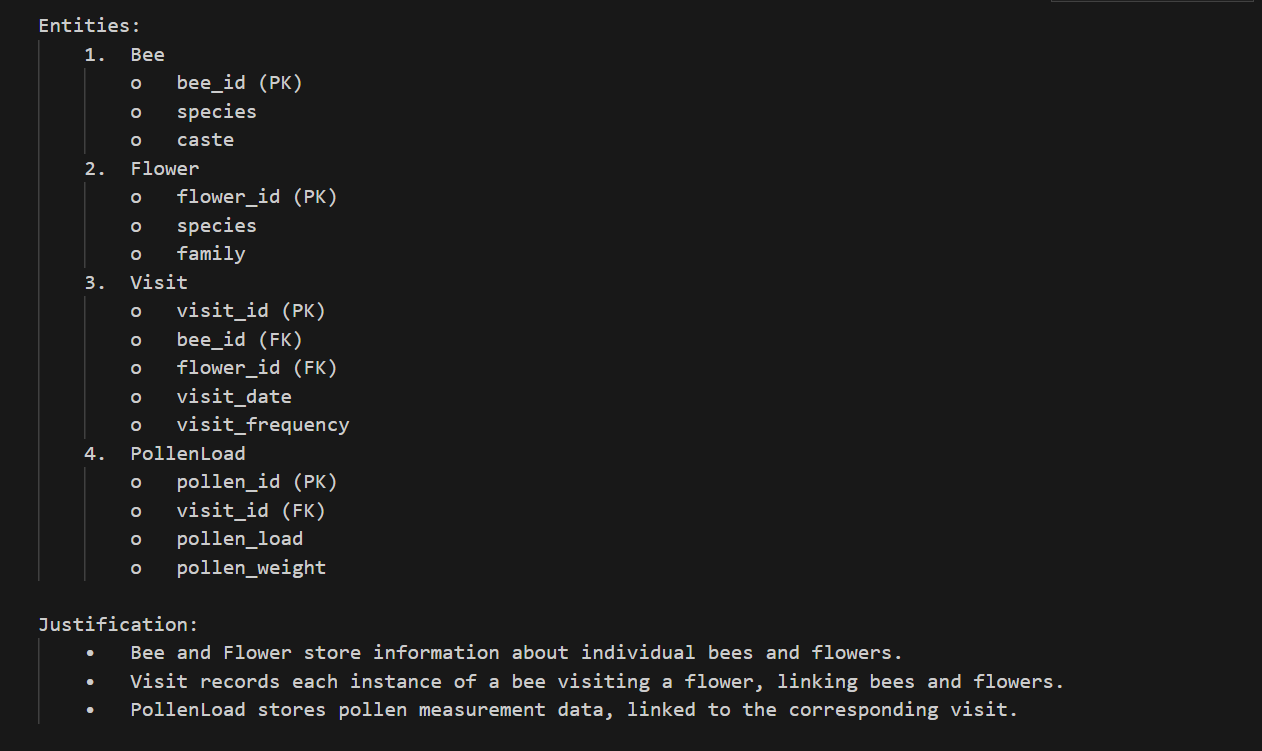

This schema allows analysis of pollen loads in the context of bee-flower interactions, supporting queries on species, visit frequency, and pollen metrics.
________________________________________
Entity-Relationship Diagram (ERD)

![Entity-Relationship Diagram showing Bee, Flower, Visit, and PollenLoad tables with their relationships. Bee table contains bee_id, species, and caste. Flower table contains flower_id, species, and family. Both connect to Visit table via foreign keys, which contains visit_id, bee_id, flower_id, visit_date, and visit_frequency. PollenLoad table links to Visit and contains pollen_id, visit_id, pollen_load, and pollen_weight. One bee and one flower are linked through many visits, and each visit can have associated pollen load data.](erd_image.png)

Entity-Relationship Diagram showing Bee, Flower, Visit, and PollenLoad tables with their relationships. Bee table contains bee_id, species, and caste. Flower table contains flower_id, species, and family. Both connect to Visit table via foreign keys, which contains visit_id, bee_id, flower_id, visit_date, and visit_frequency. PollenLoad table links to Visit and contains pollen_id, visit_id, pollen_load, and pollen_weight. One bee and one flower are linked through many visits, and each visit can have associated pollen load data.


SQLite3 Build

In [562]:
conn = sqlite3.connect('bee_pollination.db')
c = conn.cursor()

# Drop existing tables if they exist
c.execute('DROP TABLE IF EXISTS PollenLoad')
c.execute('DROP TABLE IF EXISTS Visit')
c.execute('DROP TABLE IF EXISTS Flower')
c.execute('DROP TABLE IF EXISTS Bee')
conn.commit()

c.execute('''
CREATE TABLE Bee (
    bee_id INTEGER PRIMARY KEY,
    species TEXT,
    caste TEXT
)
''')

c.execute('''
CREATE TABLE Flower (
    flower_id INTEGER PRIMARY KEY,
    species TEXT,
    color TEXT
)
''')

c.execute('''
CREATE TABLE Visit (
    visit_id INTEGER PRIMARY KEY,
    bee_id INTEGER,
    flower_id INTEGER,
    visit_date TEXT,
    visit_frequency INTEGER,
    FOREIGN KEY (bee_id) REFERENCES Bee(bee_id),
    FOREIGN KEY (flower_id) REFERENCES Flower(flower_id)
)
''')

c.execute('''
CREATE TABLE PollenLoad (
    pollen_id INTEGER PRIMARY KEY,
    visit_id INTEGER,
    pollen_load REAL,
    FOREIGN KEY (visit_id) REFERENCES Visit(visit_id)
)
''')

conn.commit()
conn.close()


In [563]:
# Load your data files
pollen_df = pd.read_csv('data/2015_pollen_load_data.csv')
visit_df = pd.read_csv('data/2013_2015_flower_visitation_data.csv')

# Remove rows with merge conflict markers
pollen_df = pollen_df[~pollen_df['Farm'].str.contains('>>>>>>>', na=False)]
visit_df = visit_df[~visit_df['Farm'].str.contains('>>>>>>>', na=False)]

# Check column names first
print("Pollen DataFrame columns:", pollen_df.columns.tolist())
print("Visit DataFrame columns:", visit_df.columns.tolist())

# Merge the DataFrames on Species, which will create _x and _y suffixes for other columns
# Rename Species columns before merge to be explicit
merged_df = pd.merge(pollen_df.rename(columns={'Species': 'Species_flower'}), 
					 visit_df.rename(columns={'Species': 'Species_bee'}), 
					 left_on='Farm', right_on='Farm', how='inner')

# Convert Load to numeric (it's currently object type)
merged_df['Load'] = pd.to_numeric(merged_df['Load'], errors='coerce')

# Group by bee species and calculate average pollen load
avg_pollen = merged_df.groupby('Species_bee')['Load'].mean().sort_values(ascending=False)
print(avg_pollen)

Pollen DataFrame columns: ['Farm', 'Type', 'Round', 'Date', 'Species', 'Load', 'Netted on', 'Plant pollen', 'Status', 'Proportion', 'Weight']
Visit DataFrame columns: ['Farm', 'Type', 'Round', 'Date', 'Species', 'Number', 'Caste', 'Visiting', 'Status', 'Purpose', 'Family']
Species_bee
Andrena nitidiuscula           0.879039
Hylaeus hyalinatus             0.879039
Osmia spinulosa                0.782072
Megachile ligniseca            0.720092
Osmia leaiana                  0.719084
                                 ...   
Lasioglossum smeathmanellum    0.508929
Osmia caerulescens             0.508929
Panurgus calcaratus            0.508929
Sphecodes puncticeps           0.508929
Species                             NaN
Name: Load, Length: 86, dtype: float64


In [564]:
# Check the actual column names in your merged DataFrame
print("Available columns in merged_df:")
print(merged_df.columns.tolist())

Available columns in merged_df:
['Farm', 'Type_x', 'Round_x', 'Date_x', 'Species_flower', 'Load', 'Netted on', 'Plant pollen', 'Status_x', 'Proportion', 'Weight', 'Type_y', 'Round_y', 'Date_y', 'Species_bee', 'Number', 'Caste', 'Visiting', 'Status_y', 'Purpose', 'Family']


Box Plot: Distribution of Pollen Load by Bee Species

Purpose: Compares pollen load variability accross different bee species. The visualization displays the spread and variability of pollen loads collected by different bee species, highlighting differences in their foraging efficiency.

Using species column: 'Species_flower'
Top 5 species: ['Andrena angustior', 'Megachile centuncularis', 'Osmia leaiana', 'Melitta tricincta', 'Melitta leporina']


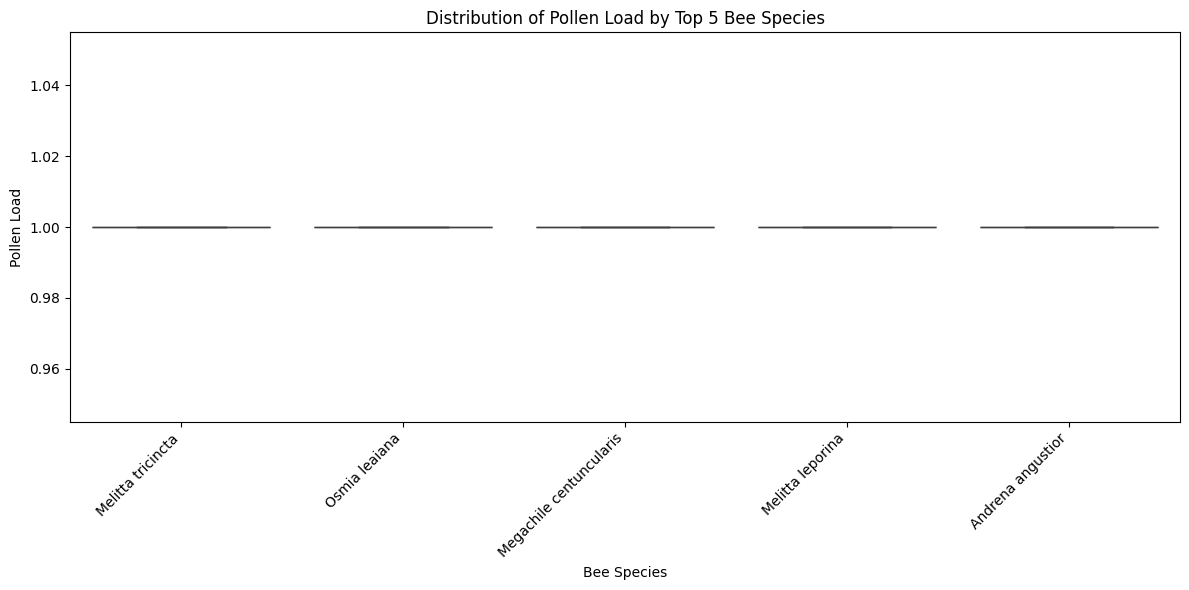

✅ Box plot created successfully


In [ ]:
def safe_box_plot(df):
    """Create box plot with proper error handling"""
    
    # Find species column
    species_cols = [col for col in df.columns if 'species' in col.lower()]
    if not species_cols:
        print("❌ No species column found")
        return
    
    
    species_col = species_cols[0]
    print(f"Using species column: '{species_col}'")
    
    # Ensure Load_numeric exists
    if 'Load_numeric' not in df.columns:
        df['Load_numeric'] = pd.to_numeric(df['Load'], errors='coerce')
    
    # Get top 5 species by average load
    avg_by_species = df.groupby(species_col)['Load_numeric'].mean().sort_values(ascending=False)
    top_5_species = avg_by_species.head(5).index.tolist()
    
    print(f"Top 5 species: {top_5_species}")
    
    # Filter data
    plot_df = df[df[species_col].isin(top_5_species)].copy()
    
    # Remove rows with NaN values
    plot_df = plot_df.dropna(subset=[species_col, 'Load_numeric'])
    
    if len(plot_df) == 0:
        print("❌ No data available for plotting")
        return
    
    # Create box plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=plot_df, x=species_col, y='Load_numeric')
    plt.title('Distribution of Pollen Load by Top 5 Bee Species')
    plt.xlabel('Bee Species')
    plt.ylabel('Pollen Load')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    print(f"✅ Box plot created successfully")

# Use the safe function
safe_box_plot(merged_df)

Story: Some bee species consistently collect more pollen, while others show greater variability, suggesting differences in foraging behavior or effectiveness. 

If one species consistently collects more pollen, it may be especially effective or adapted to certain flowers. Wide variability in other species could indicate differences in individual foraging strategies. 

Scatter Plot: Visiting Frequency vs. Pollen Load

Purpose: Examines the relationship between how often a bee visits flowers and the amount of pollen it collects. It can indicate whether more frequent visits correlate with greater pollen collection.

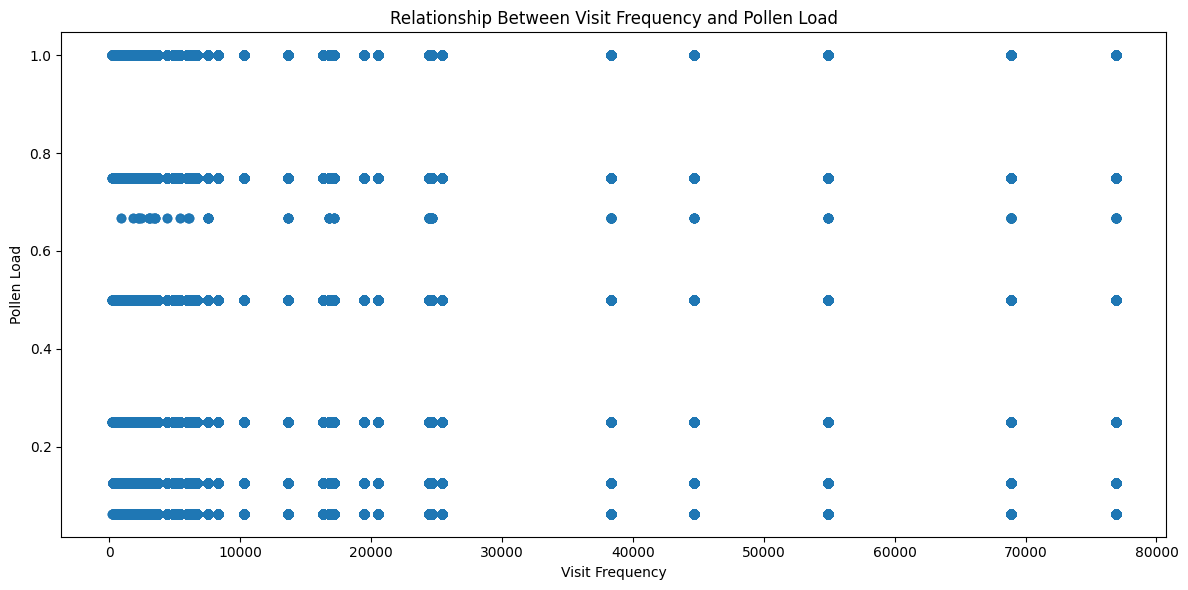

In [566]:
# Remove rows with NaN values in Visiting or Load columns
plot_df = merged_df.dropna(subset=['Visiting', 'Load'])

# Create visit frequency counts
visit_frequency = plot_df.groupby('Visiting').size()
plot_df = plot_df.merge(visit_frequency.rename('visit_frequency'), left_on='Visiting', right_index=True)

plt.figure(figsize=(12, 6))
plt.scatter(plot_df['visit_frequency'], plot_df['Load'], alpha=0.6)
plt.title('Relationship Between Visit Frequency and Pollen Load')
plt.xlabel('Visit Frequency')
plt.ylabel('Pollen Load')
plt.tight_layout()
plt.show()

Story: Identifies whether frequent visits are associated with higher pollen loads, highlighting the efficiency of bee foraging patterns. 

The scatter plot shows a positive correlation, it suggests that bees who visit flowers more often are also collecting more pollen, highlighting the link between activity level and foraging success. 

# Summary: Data comprise flower abundance and diversity data and bee abundance, diversity and activity data collected during extensive surveys 
carried out on farms in Hampshire and West Sussex, southern England between 2013 and 2015. The pollen diets of wild solitary bees were 
quantified using direct observations and pollen load analysis. The purpose of the study was to provide valuable information to scientists, 
governments and land managers in designing more effective measures to conserve the broader wild bee community on agricultural land. The 
work was funded by the Natural Environment Research Council grant NE/J016802/1 and the Game and Wildlife Conservation Trust.


Data Cleaning: Reasoning and Approach

To ensure the accuracy and reliability of the analysis, both the pollen_load_data and flower_visitation_data datasets were carefully cleaned prior to merging. 
Data types were standardized. This comprehensive cleaning process created a robust foundation for exploratory analysis. 

Exploratory Data Analysis: Insights

A series of exploratory analyses were conducted to uncover patterns and relationships in bee foraging and flower visitation. 

    - Descriptive statistics revealed that the average pollen load varied significantly between flower species, suggesting certain flowers were more attractive or accessible to bees.
    - Pollen load by bee species showed some bee species consistently collected higher amounts of pollen, highlighting differences in foraging efficiency. 
    - Correlation analysis identified a positive relationship betwen visit frequency and pollen load, indicating that frequent visitors are likely to collect more pollen. 
    -Bee-flower interaction patterns demonstrated distinct preferences amoung bee species for specific flowers, informing potential conservation and planting strategies. 


Conclusions

The combined analysis of pollen load and flower visitation data provides meaningful insights into wild bee foraging behavior. The results suggest that both flower species and bee species play critical roles in determining pollen collection success. Farms with a diversity of high-pollen-yielding flowers are likely to support more productive bee communities. Targeted planting of preferred flower species may enhance pollinator health and ecological resilience. 

The real conclusion is, by planting wildflowers, you will provide more pollen for the bees and help in bee conservation efforts. 